In [12]:
import pandas as pd

SMC = 'w/ resampling'
LPOE = 'w/ grammar constraint'
IS = 'w/ weight correction'
IS_slow = 'w/ semantic potential'

data = [
    # SMC
    [SMC, 'Planetarium', 0.419, 0.365, 0.476],
    [SMC, 'GDB-17', 0.577, 0.557, 0.592],
    [SMC, 'DS1000', 0.270, 0.250, 0.292],
    [SMC, 'Spider', 0.620, 0.597, 0.644],

    [IS_slow, 'Planetarium', 0.257, 0.21, 0.31],
    [IS_slow, 'GDB-17', 0.404, 0.37, 0.44],
    [IS_slow, 'DS1000', 0.223, 0.19, 0.27],
    [IS_slow, 'Spider', 0.618, 0.59, 0.64],

    [IS, 'Planetarium', 0.083, 0.059, 0.113],
    [IS, 'GDB-17', 0.228, 0.205, 0.252],
    [IS, 'DS1000', 0.116, 0.09, 0.15],
    [IS, 'Spider', 0.597, 0.572, 0.620],
    
    [LPOE, 'Planetarium', 0.086, 0.066, 0.112],
    [LPOE, 'GDB-17', 0.189, 0.170, 0.209],
    [LPOE, 'DS1000', 0.076, 0.06, 0.10],
    [LPOE, 'Spider', 0.559, 0.536, 0.581],
    
    ['LM', 'Planetarium', 0.063, 0.049, 0.082],
    ['LM', 'GDB-17', 0.132, 0.117, 0.148],
    ['LM', 'DS1000', 0.117, 0.093, 0.139],
    ['LM', 'Spider', 0.531, 0.508, 0.553]
]

df = pd.DataFrame(data, columns=['Method', 'Domain', 'Score', 'Lower', 'Upper'])

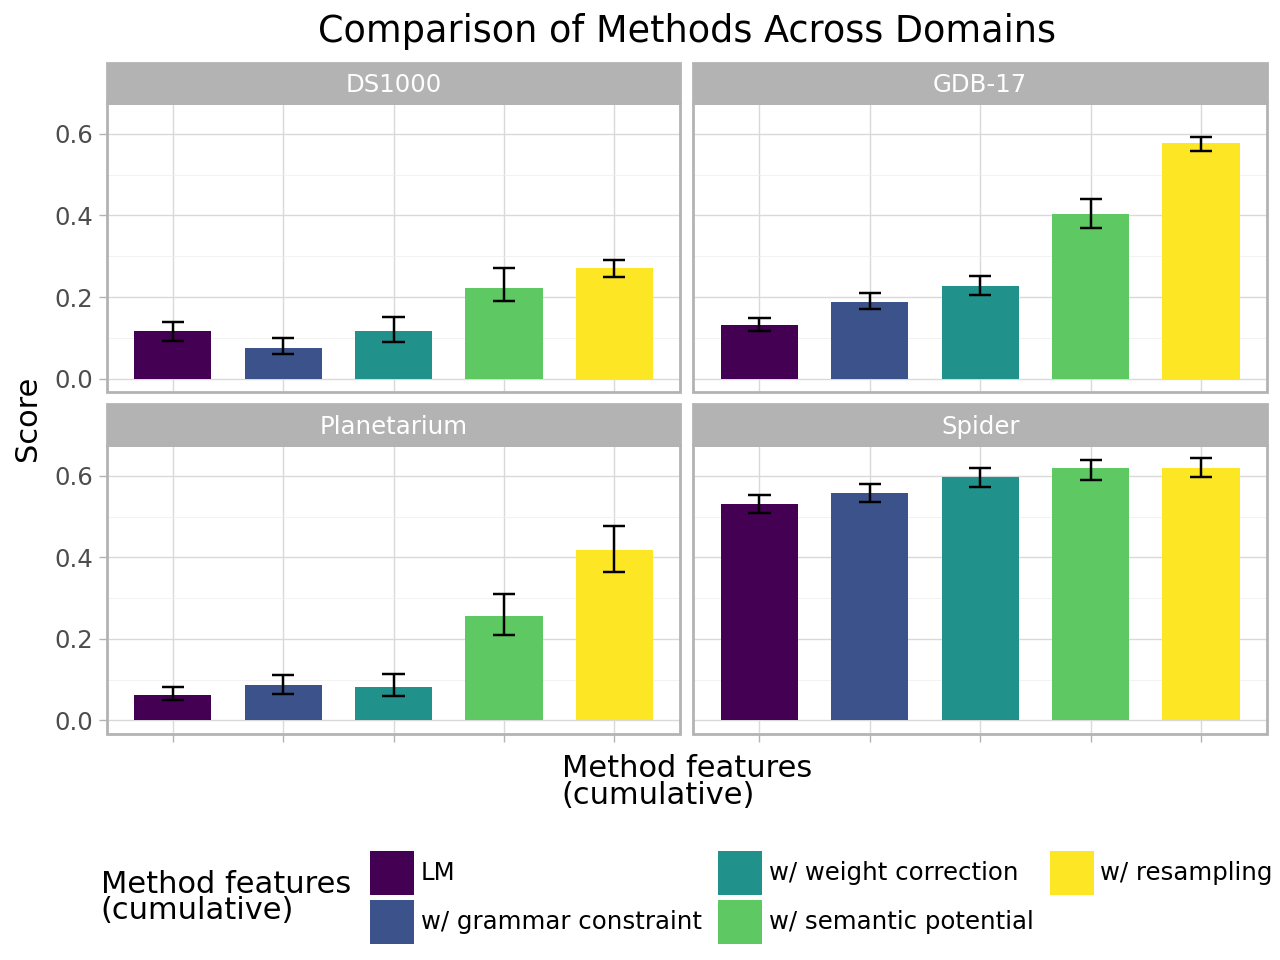

In [16]:
from plotnine import (
        ggplot, aes, geom_bar, geom_errorbar, facet_wrap, theme_light, 
        labs, theme, element_text, guides, guide_legend, scale_fill_manual,
        element_blank
)
from pandas import CategoricalDtype

method_order = CategoricalDtype(categories=['LM', LPOE, IS, IS_slow, SMC], ordered=True)
df['Method features\n(cumulative)'] = df['Method'].astype(method_order)

df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
df['Lower CI'] = pd.to_numeric(df['Lower'], errors='coerce')
df['Upper CI'] = pd.to_numeric(df['Upper'], errors='coerce')

colors = ["#D55E00", "#009E73", "#56B4E9", "#E69F00"]

plot = (ggplot(df, aes(x='Method features\n(cumulative)', y='Score', fill='Method features\n(cumulative)'))
        + geom_bar(stat='identity', position='dodge', width=0.7)
        + geom_errorbar(aes(ymin='Lower', ymax='Upper'), width=0.2)
        + facet_wrap('~Domain', nrow=2)
        + theme_light()
        + labs(title='Comparison of Methods Across Domains', y='Score')
        + theme(axis_text_x=element_blank(), legend_position='bottom')
        + guides(fill=guide_legend(nrow=2))
)

# Display the plot
plot